# A2_박성건_빅데이터실습과제7
# 11월 19일 목요일

# 의사결정나무_분류
유방암 결과를 분류하는 의사결정나무 모델

# 실습과제 피피티에 악성과 양성 0,1이 잘못기재되어있는거 같습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


import graphviz

In [2]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv", engine='python',encoding='cp949')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [5]:
#결측치가 있는지 확인한다.
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
df_raw.corr()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
mean radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [7]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)

# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [8]:
## 적절하게 나뉜것을 확인할 수 있음
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test validation X size: {}".format(df_validation_x.shape))
print("test validation Y size: {}".format(df_validation_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (227, 30)
train data Y size: (227,)
test validation X size: (171, 30)
test validation Y size: (171,)
test data X size: (171, 30)
test data Y size: (171,)


In [9]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeClassifier(random_state=1234)

In [10]:
#uncustomize한 모델의 스코어
print("Score on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.895


In [11]:
train_accuracy = []; test_accuracy=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_accuracy
df_score_depth["TestAccuracy"] = test_accuracy

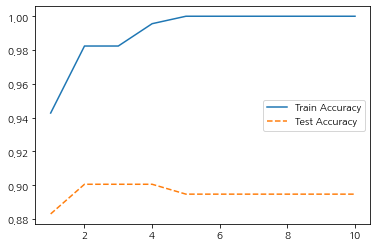

In [12]:
df_score_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [13]:
# depth는 3이 적당해 보인다. 그 이유는 4이상은 과적합이 우려되고 테스트와 트레인 차이가 많이난다.

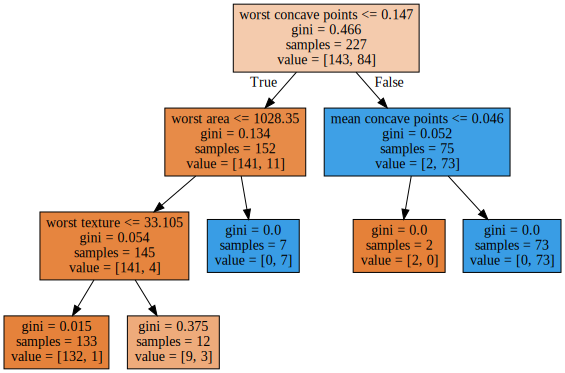

In [14]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_depth.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_depth.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [15]:
train_accuracy = []; test_accuracy=[]
para_split = [s_split*10 for s_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=3,
                                 min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["TrainAccuracy"] = train_accuracy
df_score_split["TestAccuracy"] = test_accuracy

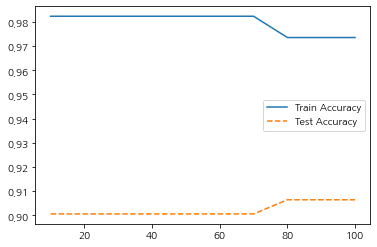

In [16]:
df_score_split.round(3)

plt.plot(para_split,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [17]:
#min_sample_split은 큰 차이가 없으니 따로 설정하지 않는다.

In [18]:
train_accuracy = []; test_accuracy=[]
para_leaf = [n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth=3,
                                min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_accuracy
df_score_leaf["TestAccuracy"] = test_accuracy

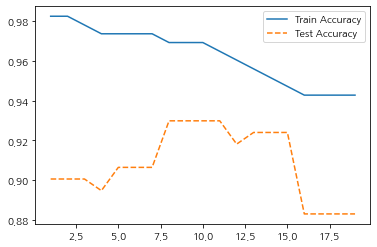

In [19]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [20]:
# min_sample_leaf는 10이 적당해 보인다.

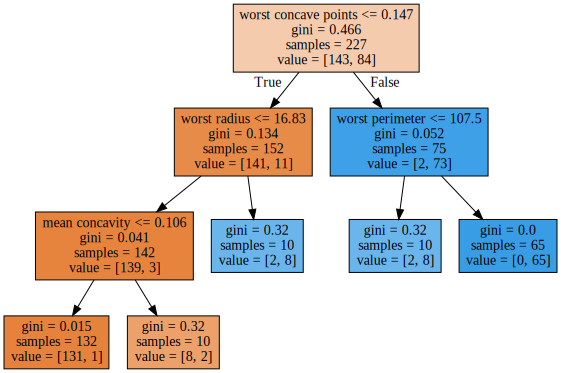

In [21]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeClassifier(random_state = 1234, max_depth=3,  min_samples_leaf=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf9.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf9.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [22]:
tree_final = DecisionTreeClassifier(min_samples_leaf=10, max_depth=3, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

y_pred = tree_final.predict(df_test_x)

print("Score on traing set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))


Score on traing set:0.969
Score on test set:0.930
Confusion matrix:
[[98  7]
 [ 5 61]]


In [23]:
# 최종 트리모델은 트레이닝셋과 테스트셋 스코어가 높고 비슷함으로 괜찮은 모델이라고 볼 수 있다.
# 하지만 Confusion matrix를 보면 데이터의 Unbalance를 볼 수 있다.
# 실제 악성을 악성이 아니라 한 경우가 5개가 된다. 즉 al탐이 5/66이다. 유방암 진단은 중요함으로
# 악성 미탐률을 줄여야 한다. 즉 좋은 모델은 아니다.

In [24]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst concave points,0.865
20,worst radius,0.120
22,worst perimeter,0.007
6,mean concavity,0.007
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000


Text(0, 0.5, '변수')

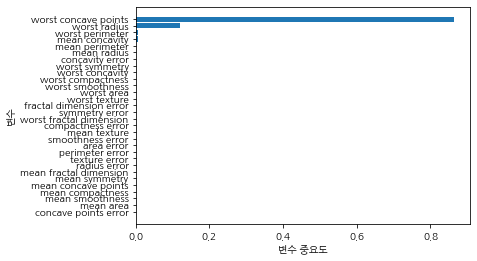

In [25]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결론 유방암 진단을 할때 테스트와 트레인셋이 비슷하고 높은 정확도를 가지지만 유방암 진단은 악성인 경우를 찾지 못한 경우 치명적이다. 즉 악성 찾을 확률을 99퍼센트 이상으로 높혀야 한다.

# 랜덤포레스트

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import graphviz

In [27]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [28]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv", engine='python',encoding='cp949')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [30]:
#결측치가 있는지 확인한다.
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [31]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)

# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [32]:
## 적절하게 나뉜것을 확인할 수 있음
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test validation X size: {}".format(df_validation_x.shape))
print("test validation Y size: {}".format(df_validation_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (227, 30)
train data Y size: (227,)
test validation X size: (171, 30)
test validation Y size: (171,)
test data X size: (171, 30)
test data Y size: (171,)


In [33]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on traing set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.924


In [34]:
train_accuracy = []; test_accuracy=[]
para_n_tree = [n_tree * 10   for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=v_n_estimators)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

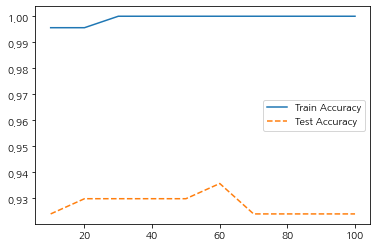

In [35]:
df_accuracy_n.round(3)

plt.plot(para_n_tree,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [36]:
# 랜덤 포레스트에서 나무의 수는 55개 정도가 적합한것같다 60개 이후로는 테스트 정확도가 떨어지기 때문이다.

In [37]:
train_accuracy = []; test_accuracy=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234,n_estimators = 55, max_depth=v_max_depth)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

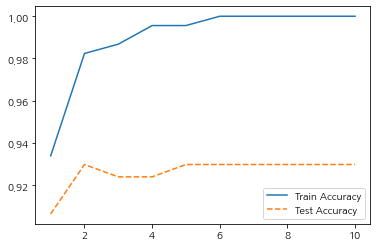

In [38]:
df_accuracy_depth.round(3)

plt.plot(para_depth,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [39]:
# depth는 5가 적당해보인다 6이상은 과적합 같다.

In [40]:
train_accuracy = []; test_accuracy=[]
para_split = [s_split*10 for s_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state = 1234, max_depth=5,n_estimators =55,
                                 min_samples_split=v_min_samples_split)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSampleSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

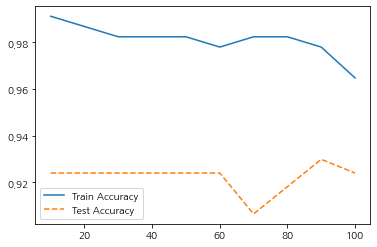

In [41]:
df_accuracy_split.round(3)

plt.plot(para_split,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [42]:
# min_sample_split는 30정도가 적합해 보인다 

In [43]:
train_accuracy = []; test_accuracy=[]
para_leaf = [n_leaf*10 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth=5, n_estimators =55,
                                  min_samples_leaf=v_min_samples_leaf)
    
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    

    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSampleLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

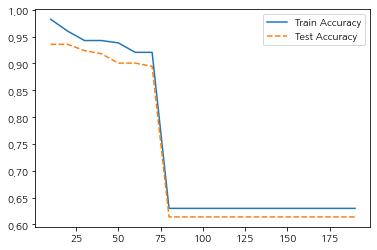

In [44]:
df_accuracy_leaf.round(3)

plt.plot(para_leaf,train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle ='--', label = "Test Accuracy")
plt.legend()

In [45]:
#min_sample_leaf는 20정도가 적합해 보인다.

In [46]:
rf_final = RandomForestClassifier(min_samples_leaf=20,  max_depth=5,n_estimators=55,
                                  random_state=1234)
rf_final.fit(df_train_x,df_train_y)
y_pred = rf_final.predict(df_test_x)

In [47]:

print("Accuracy on traing set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on traing set:0.960
Accuracy on test set:0.936
Confusion matrix:
[[104   1]
 [ 10  56]]


In [48]:
r_pred = rf_final.predict(df_test_x)

In [49]:
print("Accuracy on traing set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_validation_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_validation_y,r_pred)))

Accuracy on traing set:0.960
Accuracy on test set:0.573
Confusion matrix:
[[75 34]
 [39 23]]


In [50]:
v_feature_name = df_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
20,worst radius,0.151
22,worst perimeter,0.145
27,worst concave points,0.117
6,mean concavity,0.112
23,worst area,0.097
7,mean concave points,0.079
0,mean radius,0.074
2,mean perimeter,0.049
26,worst concavity,0.041
3,mean area,0.033


Text(0, 0.5, '변수')

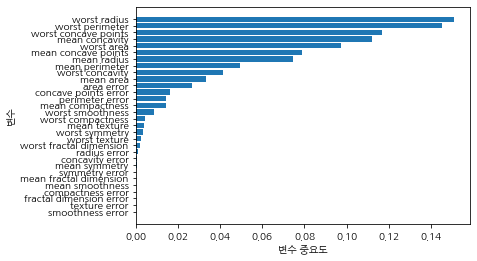

In [51]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [52]:
y_pred = tree_final.predict(df_test_x)

print("Score on traing set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(tree_final.score(df_validation_x,df_validation_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_validation_y,r_pred)))

Score on traing set:0.969
Score on test set:0.930
Confusion matrix:
[[75 34]
 [39 23]]


# 결론 랜덤 포레스트의 테스트 정확도는 0.936으로 결정나무 보다
# 정확도가 높긴하지만 악성을 양성이라고 할 확률은 10/66으로 2배나 잘못판단할 확률이 올라갔다. 즉 랜덤 포레스트로 만든 모델은 하나의 결정트리 모델보다 성능이 좋지 않으며 트리를 만들 때 들어가는 요소가 골고루 퍼져있는것을 볼 수 있다. 